### Images

In [1]:
#libraries
using Images
using OpenCV;                 cv  = OpenCV
using PreprocessingImages;    pim = PreprocessingImages

using PyCall
ros = pyimport("rosbag")      # ros.Bag.read_messages()
cvb = pyimport("cv_bridge")   # cvb.CvBridge.imgmsg_to_cv2()

PyObject <module 'cv_bridge' from '/home/ciro/miniconda3/envs/ros/lib/python3.9/site-packages/cv_bridge/__init__.py'>

In [2]:
# open bagfile
folder   = expanduser("~/bags/")
bagfile  = "video1.bag"
fullpathBagfile = folder * bagfile

"/home/ciro/bags/video1.bag"

In [3]:
# extract first frame from bagfile
desiredTopic  = "/device_0/sensor_1/Color_0/image/data"
bag    = ros.Bag(fullpathBagfile, "r")   # read file
bridge = cvb.CvBridge()

global imgrgb, imgcv
for (topic, msg, t) in bag.read_messages()
    if topic != desiredTopic   continue   end

    img = bridge.imgmsg_to_cv2(msg, desired_encoding="rgb8")   # Array{UInt8, 3} HWC
    imgrgb = pim.rs2rgb(img)
    imgcv  = pim.rs2opencv(img)
    break
end

bag.close()

#### rgb

In [4]:
size(imgrgb), typeof(imgrgb), eltype(imgrgb)

((480, 640), Matrix{RGB{N0f8}}, RGB{N0f8})

In [5]:
# save as png
save("pict.png", imgrgb)

In [6]:
# load png file
imgload = load("pict.png")
size(imgload), typeof(imgload)

((480, 640), Matrix{RGB{N0f8}})

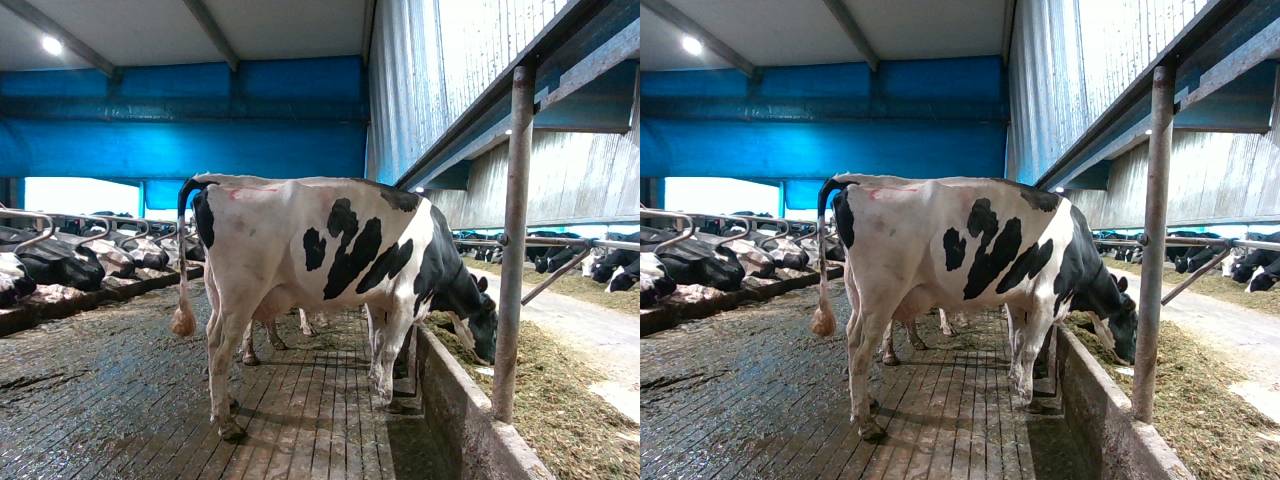

In [7]:
mosaicview(imgrgb, imgload; nrow=1)

#### opencv

In [8]:
size(imgcv), typeof(imgcv), eltype(imgcv)

((3, 640, 480), Array{UInt8, 3}, UInt8)

In [ ]:
# show opencv file
cv.imshow("Vakinha", imgcv)
cv.waitKey( Int32(0) )
cv.destroyWindow("Vakinha")

In [9]:
im=pim.rgb2opencv(imgload)
size(im), typeof(im), eltype(im)

((3, 640, 480), Base.ReinterpretArray{UInt8, 3, N0f8, Array{N0f8, 3}, false}, UInt8)

In [10]:
# show opencv file
cv.imshow("Vakinha", im)
cv.waitKey( Int32(0) )
cv.destroyWindow("Vakinha")